In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('Decision_Tree.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
df.drop(['PassengerId','Pclass' , 'Name', 'Ticket', 'Cabin'],axis = 1 ,inplace =True)

In [55]:
df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [61]:
df.isna().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
df.Age = df.Age.fillna(np.mean(df.Age))
df.Embarked = df.Embarked.fillna('S')

In [58]:
x.columns

Index(['SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')

In [59]:
dum = pd.get_dummies(x)

In [60]:
dum.head()

,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,7.2500,0,1
1,1,0,71.2833,1,0
2,0,0,7.9250,1,0
3,1,0,53.1000,1,0
4,0,0,8.0500,0,1


In [62]:
x.columns

Index(['SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')

In [63]:
x = dum.iloc[:,1:6]
y = df.iloc[:,0]

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 10)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini').fit(x_train,y_train)
ptree = dtree.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
accuracy_score(y_test,ptree)

0.7835820895522388

In [74]:
confusion_matrix(y_test,ptree)

array([[144,  30],
       [ 28,  66]], dtype=int64)

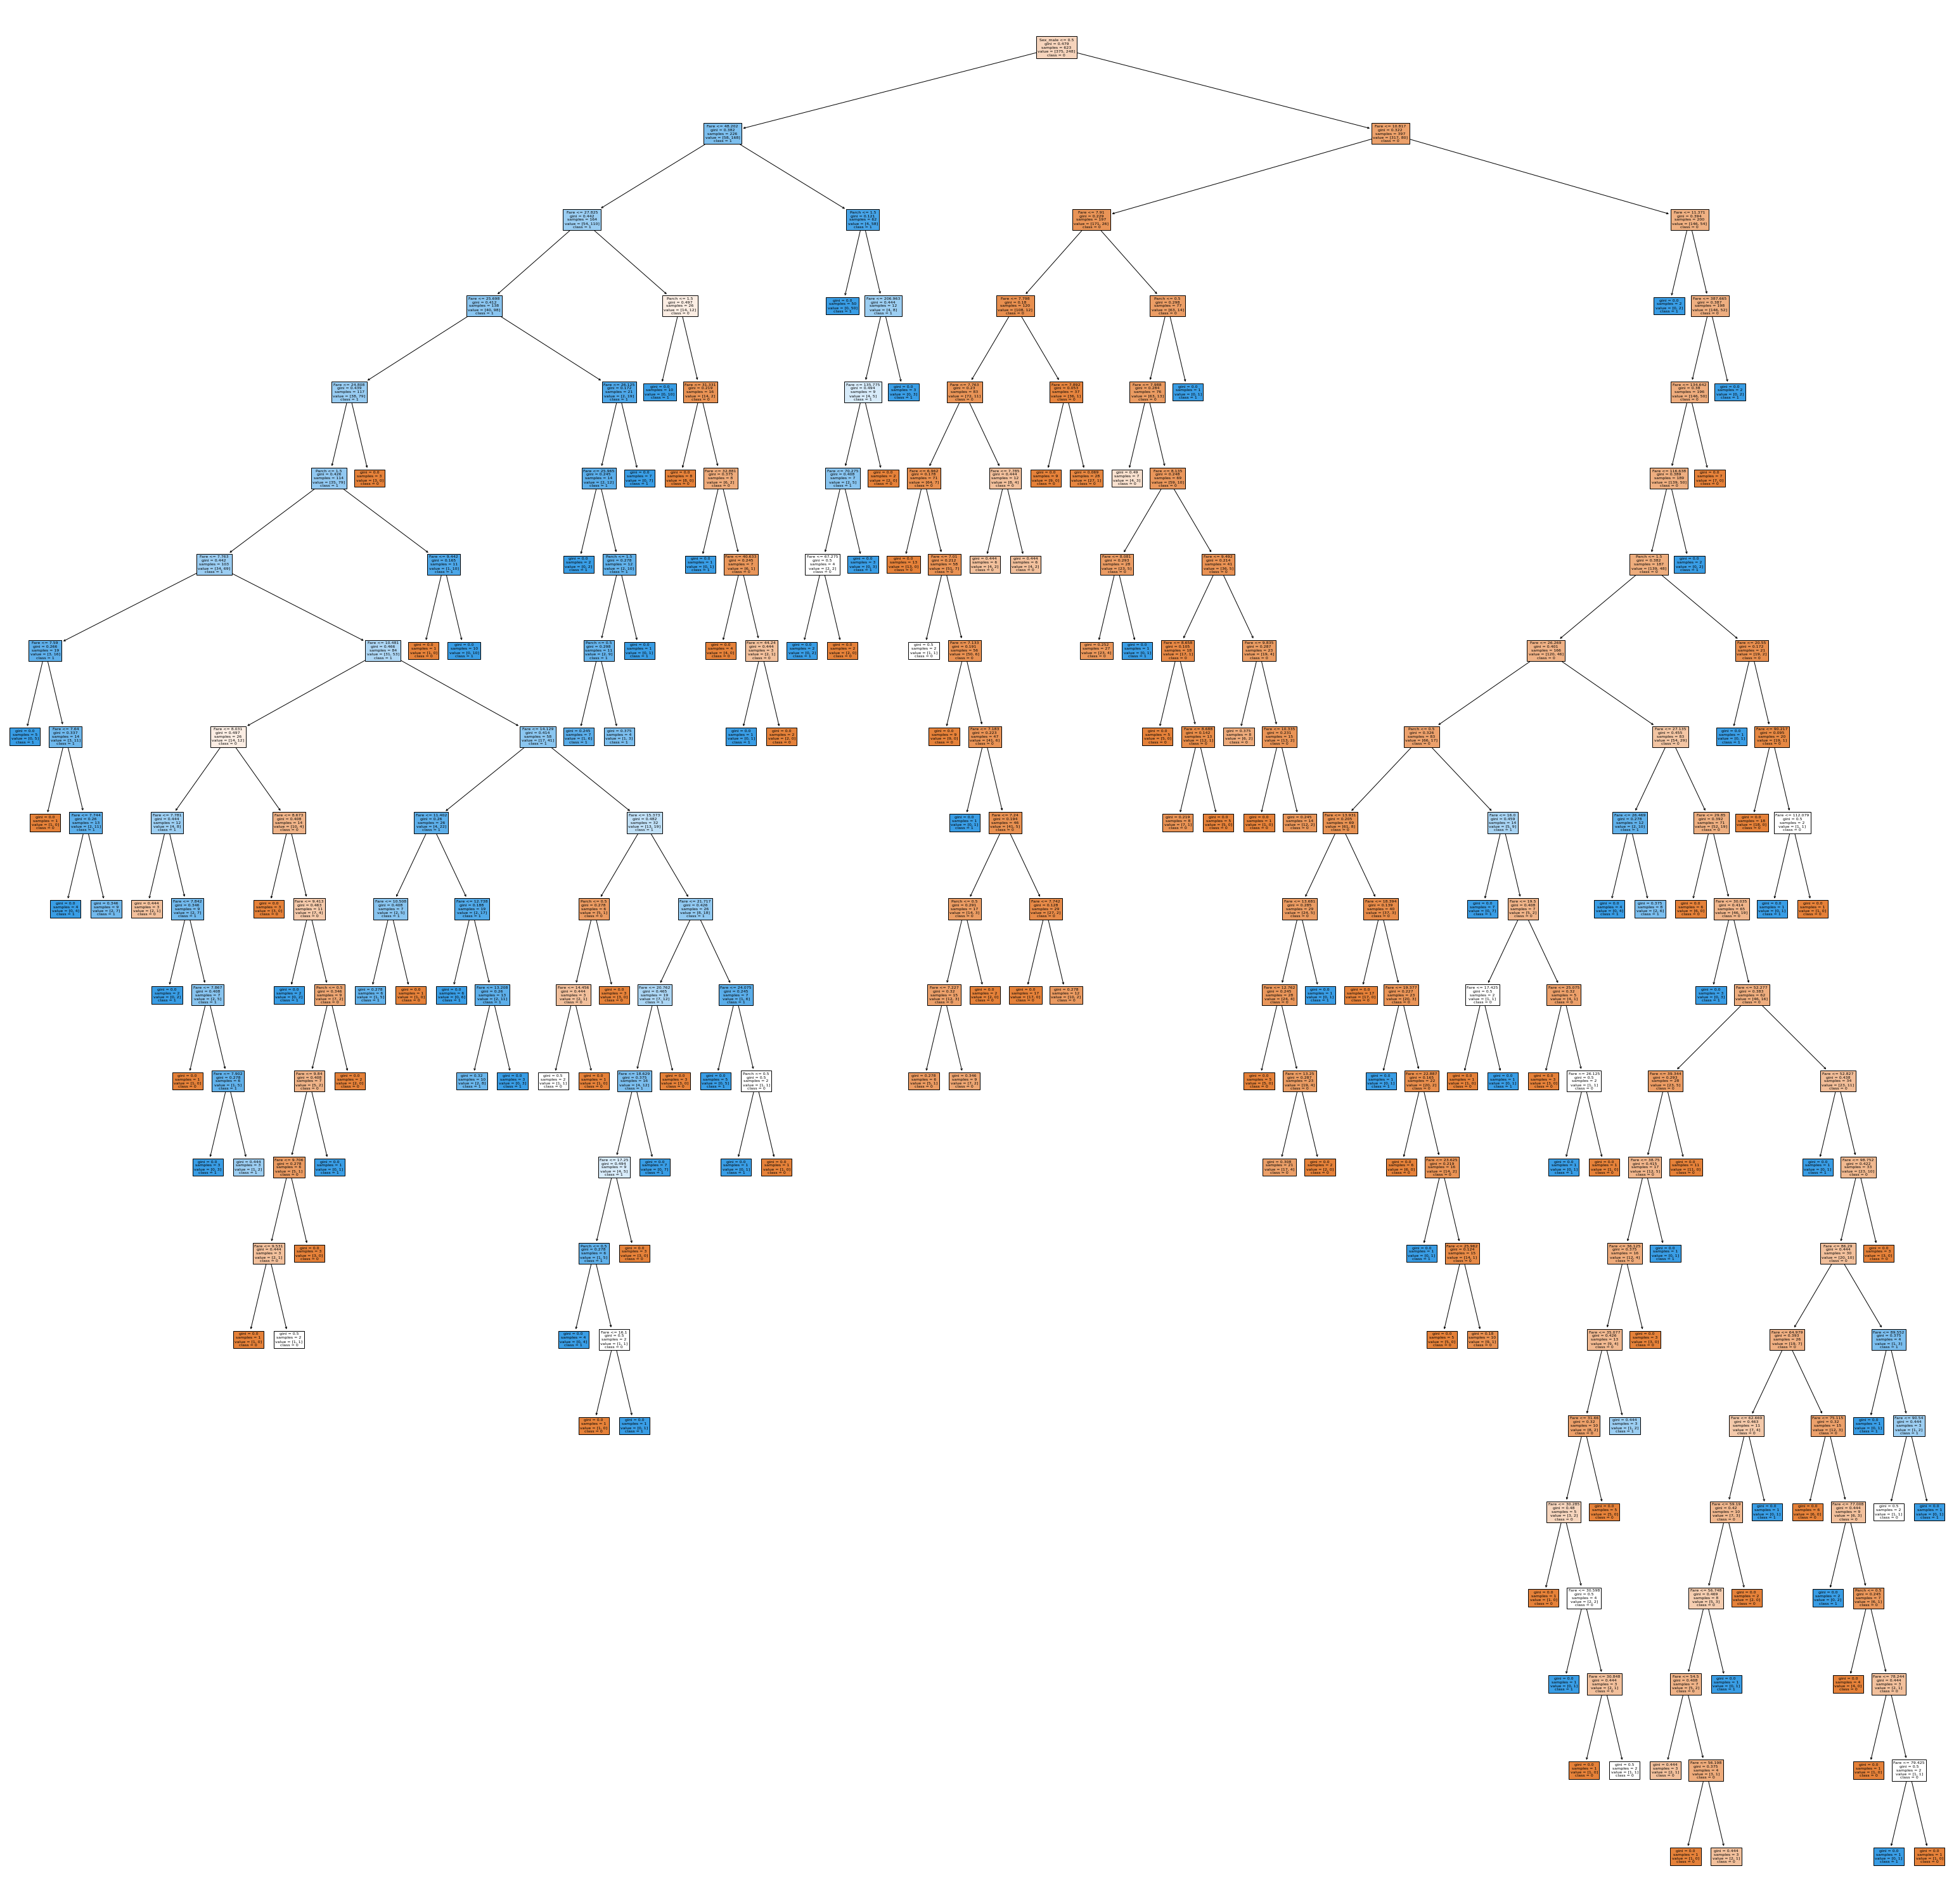

In [75]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize = (55,55))
rule = tree.plot_tree(dtree,feature_names=['Parch', 'Fare', 'Sex_female', 'Sex_male'],class_names=["0","1"],filled=True)